## 싸인 함수 회귀분석 (Sine Regression)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


## 데이터 생성

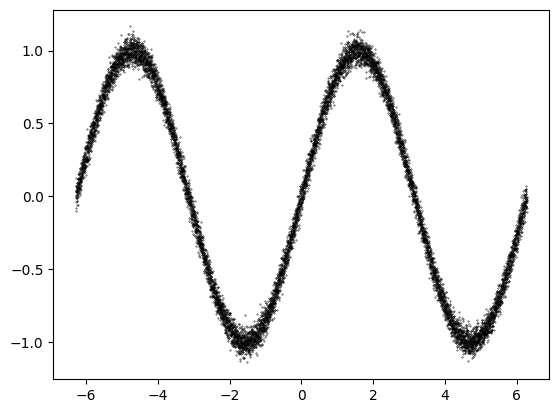

In [45]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [46]:
model = Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(1)
])

## 모델 훈련

In [47]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(inputs, outputs, epochs=20)

Epoch 1/20
  1/313 [..............................] - ETA: 1:39 - loss: 0.6092 - mae: 0.6092

2023-12-21 13:28:19.558029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.3799 - mae: 0.3799
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 0.2163 - mae: 0.2163
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 0.1801 - mae: 0.1801
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 0.1445 - mae: 0.1445
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 0.1137 - mae: 0.1137
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0851 - mae: 0.0851
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0670 - mae: 0.0670
Epoch 8/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0614 - mae: 0.0614
Epoch 9/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0521 - mae: 0.0521
Epoch 10/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0538 - mae: 0.0538
Epoch 11/20
313/313 [==============================] - 2s 7m

In [48]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs, outputs, verbose=0)
print('Test MAE:', test_mae)

2023-12-21 13:29:00.045400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 0.04793513938784599


## 테스트

 73/313 [=====>........................] - ETA: 0s

2023-12-21 13:29:01.178029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


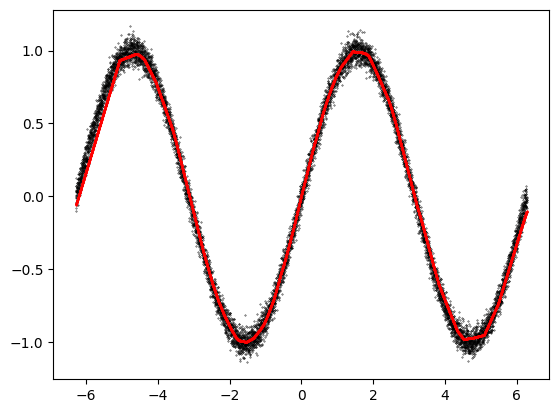

In [50]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)